### Quality Analysis for Sentimental Analysis

#### Approach:

Research different sentiment analysis models and analyze their performance (accuracy, recall, etc.) across different datasets (yelp/twitter/finance/movie). Identify the most suitable model for predictions and compare it with the previous sentiment analysis.

1. [Dictionary models](https://medium.com/@pavlo.fesenko/best-open-source-models-for-sentiment-analysis-part-1-dictionary-models-ece79e617653)

    - NLTK VADER - 0.78 accuracy on yelp data

2. Machine learning models
    - Naive Bayes - 0.67 accuracy on yelp data

3. [Deep learning models](https://medium.com/@pavlo.fesenko/best-open-source-models-for-sentiment-analysis-part-2-neural-networks-9749fb5fff76)

    - HuggingFace BERT - 0.96 accuracy on yelp data
    - Flair RNN - 0.96 accuaracy on yelp data
    - Flair DistilBERT - 0.97 accuracy on yelp data

#### Summary:
Deep learning models generally outperform dictionary-based models, especially when handling more complex sentiment tasks. The model’s performance on the Yelp dataset can serve as a good reference for identifying sentiments in iHerb product reviews, as both involve customer reviews. If a fine-tuned deep learning model specifically for Amazon reviews can be found, it would likely be an even better choice due to the similarity in review formats and content between Amazon and iHerb.

#### Sentiment Prediction Using Fine-tuned BERT Model (run on google colab)

In [1]:
import torch
import pandas as pd
import numpy as np
from transformers import RobertaForSequenceClassification, RobertaTokenizer
from tqdm import tqdm


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv('/content/drive/MyDrive/passionflower_reviews_with_sentiment.csv',index_col = 0)

df.head(10)



,product_id,brand_id,brand_name,product_title,price,rating,review_count,url,date_posted,review_title,review_text,text,vader_sentiment
0,1236,SNS,Source Naturals,"Source Naturals, Hi-Stress B&C With Herbs, 120...",$15.41,4.6,247,https://www.iherb.com/pr/source-naturals-hi-st...,2024-10-13,NaN,I bought this medicine after reading reviews.,nan I bought this medicine after reading revie...,pos
1,1236,SNS,Source Naturals,"Source Naturals, Hi-Stress B&C With Herbs, 120...",$15.41,4.6,247,https://www.iherb.com/pr/source-naturals-hi-st...,2024-09-20,The capsule is relatively large,The capsules are relatively large and contain ...,The capsule is relatively large The capsules a...,pos
2,1236,SNS,Source Naturals,"Source Naturals, Hi-Stress B&C With Herbs, 120...",$15.41,4.6,247,https://www.iherb.com/pr/source-naturals-hi-st...,2024-09-18,great,I think it helps..before going to bed,great I think it helps..before going to bed,pos
3,1236,SNS,Source Naturals,"Source Naturals, Hi-Stress B&C With Herbs, 120...",$15.41,4.6,247,https://www.iherb.com/pr/source-naturals-hi-st...,2024-09-14,NaN,"The best remedy for stress, you can take it in...","nan The best remedy for stress, you can take i...",pos
4,1236,SNS,Source Naturals,"Source Naturals, Hi-Stress B&C With Herbs, 120...",$15.41,4.6,247,https://www.iherb.com/pr/source-naturals-hi-st...,2024-08-25,NaN,"It really helps. The composition is natural, h...",nan It really helps. The composition is natura...,pos
5,1236,SNS,Source Naturals,"Source Naturals, Hi-Stress B&C With Herbs, 120...",$15.41,4.6,247,https://www.iherb.com/pr/source-naturals-hi-st...,2024-08-19,This is a really good product for stress relief.,I have seen the effects of taking this product...,This is a really good product for stress relie...,pos
6,1236,SNS,Source Naturals,"Source Naturals, Hi-Stress B&C With Herbs, 120...",$15.41,4.6,247,https://www.iherb.com/pr/source-naturals-hi-st...,2024-08-13,Taken due to stress,"I took it because I'm sensitive to stress, but...",Taken due to stress I took it because I'm sens...,neg
7,1236,SNS,Source Naturals,"Source Naturals, Hi-Stress B&C With Herbs, 120...",$15.41,4.6,247,https://www.iherb.com/pr/source-naturals-hi-st...,2024-08-01,NaN,"It is a very good product, I highly recommend ...","nan It is a very good product, I highly recomm...",pos
8,1236,SNS,Source Naturals,"Source Naturals, Hi-Stress B&C With Herbs, 120...",$15.41,4.6,247,https://www.iherb.com/pr/source-naturals-hi-st...,2024-07-16,super complex,Stress Complex (Hi-Stress B and C) is an effec...,super complex Stress Complex (Hi-Stress B and ...,pos
9,1236,SNS,Source Naturals,"Source Naturals, Hi-Stress B&C With Herbs, 120...",$15.41,4.6,247,https://www.iherb.com/pr/source-naturals-hi-st...,2024-07-10,Excellent!,The supplement fights stress very well. I use ...,Excellent! The supplement fights stress very w...,pos


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 163497 entries, 0 to 163496
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   product_id       163497 non-null  int64  
 1   brand_id         163497 non-null  object 
 2   brand_name       163497 non-null  object 
 3   product_title    163497 non-null  object 
 4   price            163497 non-null  object 
 5   rating           163497 non-null  float64
 6   review_count     163497 non-null  int64  
 7   url              163497 non-null  object 
 8   date_posted      163497 non-null  object 
 9   review_title     69334 non-null   object 
 10  review_text      163348 non-null  object 
 11  text             163497 non-null  object 
 12  vader_sentiment  163497 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 17.5+ MB


In [9]:
# Load the fine-tuned model from Hugging Face

model_name = "AnkitAI/reviews-roberta-base-sentiment-analysis"
model = RobertaForSequenceClassification.from_pretrained(model_name)
tokenizer = RobertaTokenizer.from_pretrained(model_name)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

batch_size = 32

bert_sentiment = []

for i in tqdm(range(0,len(df),batch_size),desc = "Sentiment Prediction", unit = "batch"):
  batch_text = list(df['text'][i:i+batch_size])
# Tokenize input text in batches
  inputs = tokenizer(batch_text, return_tensors="pt", max_length=512, truncation=True, padding=True).to(device)

  # Make prediction in batches
  with torch.no_grad():
      outputs = model(**inputs)

  # Get predicted labels
  predicted_labels = outputs.logits.argmax(dim=1).cpu().numpy()  # Move back to CPU
  batch_sentiments = ['pos' if label ==1 else 'neg' for label in predicted_labels]

  bert_sentiment.extend(batch_sentiments)


Sentiment Prediction: 100%|██████████| 5110/5110 [21:39<00:00,  3.93batch/s]


In [10]:
df['bert_sentiment'] = bert_sentiment

In [11]:
df.to_csv('passionflower_reviews_with_sentiment_2.csv')

#### Sentiment Results Comparison

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('./passionflower_reviews_with_sentiment_2.csv',index_col=0)
df.head(5)

,product_id,brand_id,brand_name,product_title,price,rating,review_count,url,date_posted,review_title,review_text,text,vader_sentiment,bert_sentiment
0,1236,SNS,Source Naturals,"Source Naturals, Hi-Stress B&C With Herbs, 120...",$15.41,4.6,247,https://www.iherb.com/pr/source-naturals-hi-st...,2024-10-13,NaN,I bought this medicine after reading reviews.,I bought this medicine after reading reviews.,pos,neg
1,1236,SNS,Source Naturals,"Source Naturals, Hi-Stress B&C With Herbs, 120...",$15.41,4.6,247,https://www.iherb.com/pr/source-naturals-hi-st...,2024-09-20,The capsule is relatively large,The capsules are relatively large and contain ...,The capsule is relatively large The capsules a...,pos,pos
2,1236,SNS,Source Naturals,"Source Naturals, Hi-Stress B&C With Herbs, 120...",$15.41,4.6,247,https://www.iherb.com/pr/source-naturals-hi-st...,2024-09-18,great,I think it helps..before going to bed,great I think it helps..before going to bed,pos,pos
3,1236,SNS,Source Naturals,"Source Naturals, Hi-Stress B&C With Herbs, 120...",$15.41,4.6,247,https://www.iherb.com/pr/source-naturals-hi-st...,2024-09-14,NaN,"The best remedy for stress, you can take it in...","The best remedy for stress, you can take it i...",pos,pos
4,1236,SNS,Source Naturals,"Source Naturals, Hi-Stress B&C With Herbs, 120...",$15.41,4.6,247,https://www.iherb.com/pr/source-naturals-hi-st...,2024-08-25,NaN,"It really helps. The composition is natural, h...","It really helps. The composition is natural, ...",pos,pos


In [23]:
total_reviews = len(df)
vader_pos = df['vader_sentiment'].value_counts().get('pos',0)
vader_neg = df['vader_sentiment'].value_counts().get('neg',0)
print(f'Positive reviews in vader predictions: {(vader_pos/total_reviews)*100 :.2f}%')
print(f'Negative reviews in vader predictions: {(vader_neg/total_reviews)*100 :.2f}%')

Positive reviews in vader predictions: 92.37%
Negative reviews in vader predictions: 7.63%


In [24]:
# Analyze the percentage of positive/negative reviews in the fine-tuned model
bert_pos = df['bert_sentiment'].value_counts().get('pos', 0)
bert_neg = df['bert_sentiment'].value_counts().get('neg', 0)


print(f'Positive reviews in fine-tuned bert predictions: {(bert_pos/total_reviews)*100 :.2f}%')
print(f'Negative reviews in fine-tuned bert predictions: {(bert_neg/total_reviews)*100 :.2f}%')


Positive reviews in fine-tuned bert predictions: 88.13%
Negative reviews in fine-tuned bert predictions: 11.87%


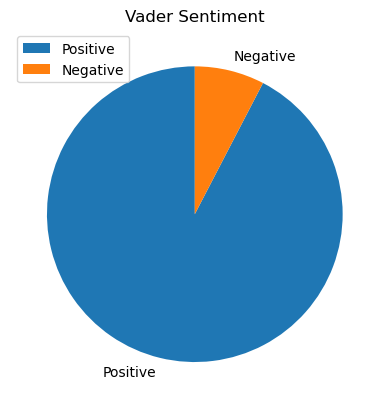

In [25]:
plt.pie([vader_pos,vader_neg],labels = ['Positive','Negative'],startangle = 90)
plt.title('Vader Sentiment')
plt.legend(loc = 2)
plt.show()

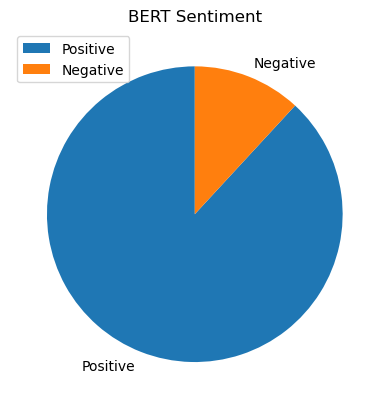

In [26]:
plt.pie([bert_pos,bert_neg],labels = ['Positive','Negative'],startangle = 90)
plt.title('BERT Sentiment')
plt.legend(loc = 2)
plt.show()

#### Analyze the disagreements

In [27]:
disagreement = df[df['bert_sentiment']!=df['vader_sentiment']]

In [28]:
disagreement_count = len(disagreement)

print(f"{disagreement_count} over {total_reviews} predictions does not agree.")

17946 over 163497 predictions does not agree.


In [48]:
disagreement.head(10)

,product_id,brand_id,brand_name,product_title,price,rating,review_count,url,date_posted,review_title,review_text,text,vader_sentiment,bert_sentiment
0,1236,SNS,Source Naturals,"Source Naturals, Hi-Stress B&C With Herbs, 120...",$15.41,4.6,247,https://www.iherb.com/pr/source-naturals-hi-st...,2024-10-13,NaN,I bought this medicine after reading reviews.,I bought this medicine after reading reviews.,pos,neg
6,1236,SNS,Source Naturals,"Source Naturals, Hi-Stress B&C With Herbs, 120...",$15.41,4.6,247,https://www.iherb.com/pr/source-naturals-hi-st...,2024-08-13,Taken due to stress,"I took it because I'm sensitive to stress, but...",Taken due to stress I took it because I'm sens...,neg,pos
13,1236,SNS,Source Naturals,"Source Naturals, Hi-Stress B&C With Herbs, 120...",$15.41,4.6,247,https://www.iherb.com/pr/source-naturals-hi-st...,2024-06-13,Complex from stress,I started taking it after feeling anxious and ...,Complex from stress I started taking it after ...,neg,pos
15,1236,SNS,Source Naturals,"Source Naturals, Hi-Stress B&C With Herbs, 120...",$15.41,4.6,247,https://www.iherb.com/pr/source-naturals-hi-st...,2024-06-01,The effect of walking is the case,"Frankly speaking, its effect is not strong. So...",The effect of walking is the case Frankly spea...,pos,neg
35,1236,SNS,Source Naturals,"Source Naturals, Hi-Stress B&C With Herbs, 120...",$15.41,4.6,247,https://www.iherb.com/pr/source-naturals-hi-st...,2024-01-07,FULL SLEEP IS A NECESSARY CONDITION FOR A HEAL...,"Full healthy sleep is necessary for health, nu...",FULL SLEEP IS A NECESSARY CONDITION FOR A HEAL...,neg,pos
44,1236,SNS,Source Naturals,"Source Naturals, Hi-Stress B&C With Herbs, 120...",$15.41,4.6,247,https://www.iherb.com/pr/source-naturals-hi-st...,2023-10-26,Complete,They are said to be beneficial for psychologic...,Complete They are said to be beneficial for ps...,neg,pos
61,1236,SNS,Source Naturals,"Source Naturals, Hi-Stress B&C With Herbs, 120...",$15.41,4.6,247,https://www.iherb.com/pr/source-naturals-hi-st...,2023-05-19,NaN,2 - 4 tablets as needed for stress. you can no...,2 - 4 tablets as needed for stress. you can n...,neg,pos
64,1236,SNS,Source Naturals,"Source Naturals, Hi-Stress B&C With Herbs, 120...",$15.41,4.6,247,https://www.iherb.com/pr/source-naturals-hi-st...,2023-04-23,NaN,"Honestly, I haven't noticed any effects. I do ...","Honestly, I haven't noticed any effects. I do...",pos,neg
71,1236,SNS,Source Naturals,"Source Naturals, Hi-Stress B&C With Herbs, 120...",$15.41,4.6,247,https://www.iherb.com/pr/source-naturals-hi-st...,2022-12-14,Ok,"I don't know why, but I don't like this brand....","Ok I don't know why, but I don't like this bra...",pos,neg
82,1236,SNS,Source Naturals,"Source Naturals, Hi-Stress B&C With Herbs, 120...",$15.41,4.6,247,https://www.iherb.com/pr/source-naturals-hi-st...,2022-01-11,NaN,I don't know the effect right now.,I don't know the effect right now.,pos,neg


In [52]:
# print first 10 reviews
disagreement = disagreement.reset_index(drop= True)
for i in range(0,10):
    print("Text: ", disagreement['text'][i])
    print("Vader Sentiment: ",disagreement['vader_sentiment'][i])
    print("BERT Sentiment: ",disagreement['bert_sentiment'][i])
    print('-'*50)

Text:   I bought this medicine after reading reviews. 
Vader Sentiment:  pos
BERT Sentiment:  neg
--------------------------------------------------
Text:  Taken due to stress I took it because I'm sensitive to stress, but my urine comes out yellow. The pills are big, so it's a bit hard to swallow.
Vader Sentiment:  neg
BERT Sentiment:  pos
--------------------------------------------------
Text:  Complex from stress I started taking it after feeling anxious and not having a restful sleep. After a week of taking it, I noticed the result, the only minus is the large size of the pill
Vader Sentiment:  neg
BERT Sentiment:  pos
--------------------------------------------------
Text:  The effect of walking is the case Frankly speaking, its effect is not strong. Some people take it and imagine that it is good. The issue is psychological, nothing more or less.
Vader Sentiment:  pos
BERT Sentiment:  neg
--------------------------------------------------
Text:  FULL SLEEP IS A NECESSARY CONDIT

In [30]:
disagreement_df = disagreement[['text','vader_sentiment','bert_sentiment']]
disagreement_df.to_csv('./sentiment_comparison.csv')

#### Manually add one column as ground truth to compare the results

In [1]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
disagreement_df = pd.read_csv('./sentiment_comparison.csv',index_col=0)
disagreement_df = disagreement_df.dropna(axis = 0)
disagreement_df.head(5)

,text,vader_sentiment,bert_sentiment,ground_truth
0,I bought this medicine after reading reviews.,pos,neg,pos
6,Taken due to stress I took it because I'm sens...,neg,pos,pos
13,Complex from stress I started taking it after ...,neg,pos,pos
15,The effect of walking is the case Frankly spea...,pos,neg,neg
35,FULL SLEEP IS A NECESSARY CONDITION FOR A HEAL...,neg,pos,pos


In [3]:
print("Ground truth: # positive = ",disagreement_df['ground_truth'].value_counts().get('pos', 0))
print("Ground truth: # nagative = ",disagreement_df['ground_truth'].value_counts().get('neg', 0))

Ground truth: # positive =  585
Ground truth: # nagative =  415


In [4]:
print("BERT prediction: # positive = ",disagreement_df['bert_sentiment'].value_counts().get('pos', 0))
print("BERT prediction: # nagative = ",disagreement_df['bert_sentiment'].value_counts().get('neg', 0))

BERT prediction: # positive =  417
BERT prediction: # nagative =  583


In [5]:
print("Vader prediction: # positive = ",disagreement_df['vader_sentiment'].value_counts().get('pos', 0))
print("Vader prediction: # nagative = ",disagreement_df['vader_sentiment'].value_counts().get('neg', 0))

Vader prediction: # positive =  583
Vader prediction: # nagative =  417


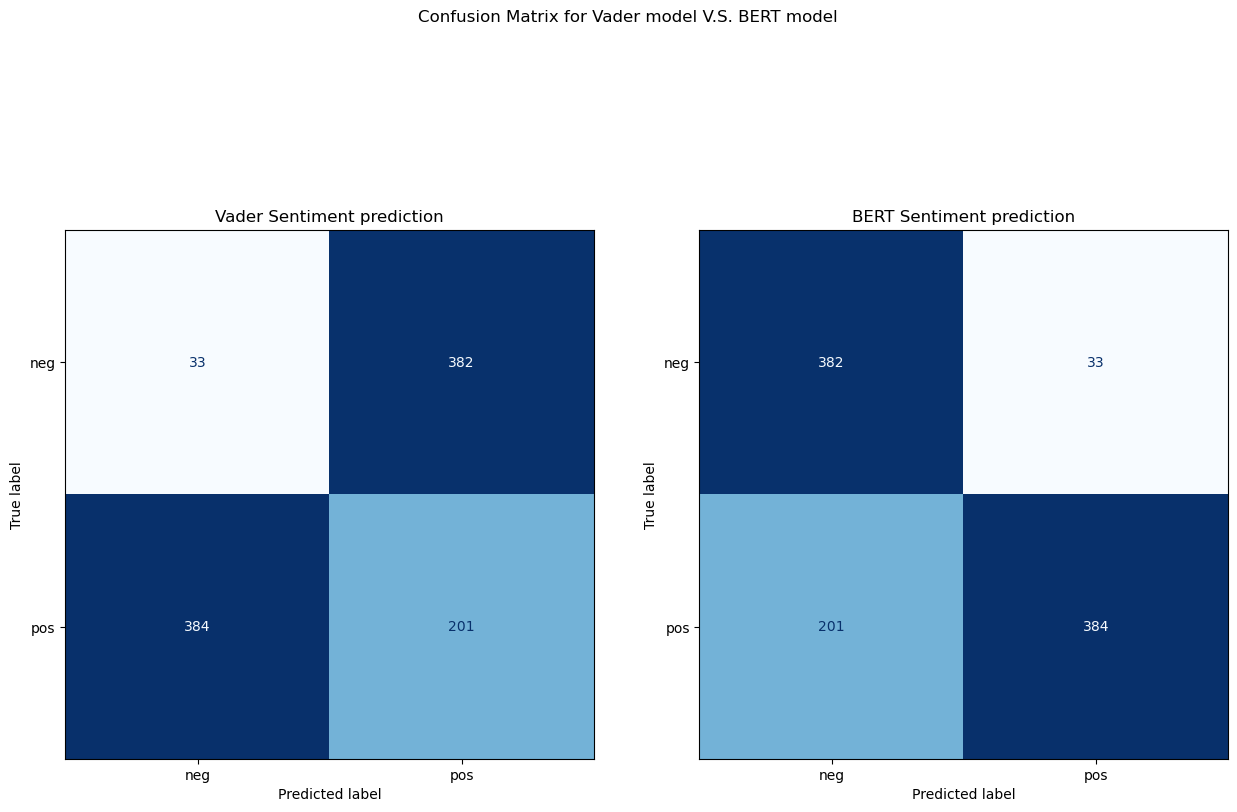

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,10))

cm1 = confusion_matrix(disagreement_df['ground_truth'],disagreement_df['vader_sentiment'])
cm2 = confusion_matrix(disagreement_df['ground_truth'],disagreement_df['bert_sentiment'])

axes[0].set_title("Vader Sentiment prediction")
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=['neg','pos'])
disp.plot(ax = axes[0],cmap='Blues',colorbar=False)

axes[1].set_title("BERT Sentiment prediction")
disp = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=['neg','pos'])
disp.plot(ax = axes[1],cmap='Blues',colorbar=False)
plt.suptitle('Confusion Matrix for Vader model V.S. BERT model')
plt.show()

In [7]:
# approx accuracy

from sklearn.metrics import accuracy_score

vader_accuracy = accuracy_score(disagreement_df['ground_truth'],disagreement_df['vader_sentiment'])

bert_accuracy = accuracy_score(disagreement_df['ground_truth'],disagreement_df['bert_sentiment'])

print("Accuracy of the Vader model: ", vader_accuracy)
print("Accuracy of the BERT model: ", bert_accuracy)

Accuracy of the Vader model:  0.234
Accuracy of the BERT model:  0.766
